In [ ]:
#installing the kaggle library
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#configuring the path 
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/ 
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c dogs-vs-cats

 99% 808M/812M [00:03<00:00, 247MB/s]
100% 812M/812M [00:03<00:00, 281MB/s]


In [ ]:
!ls

dogs-vs-cats.zip  drive  kaggle.json  sample_data


In [ ]:
#extracting the compressed dataset
from zipfile import ZipFile

dataset='/content/dogs-vs-cats.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()


In [ ]:
#extracting the compressed dataset
from zipfile import ZipFile

dataset='/content/train.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()

In [ ]:
import os 
#counting the number of files in the training folder
path,dire,files=next(os.walk('/content/train'))
file_count=len(files)
print("The number of images:",file_count)

The number of images: 25000


Printing the name of images


In [ ]:
file_names=os.listdir('/content/train/')
print(file_names)

['dog.1612.jpg', 'cat.8182.jpg', 'cat.11860.jpg', 'cat.264.jpg', 'cat.1552.jpg', 'dog.3798.jpg', 'dog.10052.jpg', 'dog.2331.jpg', 'dog.3297.jpg', 'dog.10857.jpg', 'cat.11389.jpg', 'dog.11635.jpg', 'cat.4344.jpg', 'dog.10421.jpg', 'dog.8305.jpg', 'cat.1843.jpg', 'cat.3538.jpg', 'dog.6957.jpg', 'cat.6128.jpg', 'dog.9608.jpg', 'dog.8832.jpg', 'cat.12324.jpg', 'dog.11805.jpg', 'dog.10614.jpg', 'cat.7897.jpg', 'cat.12163.jpg', 'cat.10692.jpg', 'cat.7292.jpg', 'dog.6453.jpg', 'cat.10635.jpg', 'cat.10304.jpg', 'dog.5200.jpg', 'dog.8249.jpg', 'cat.7245.jpg', 'cat.6081.jpg', 'cat.4513.jpg', 'cat.2318.jpg', 'dog.477.jpg', 'cat.9957.jpg', 'cat.2392.jpg', 'cat.4360.jpg', 'cat.10622.jpg', 'dog.4307.jpg', 'dog.6870.jpg', 'cat.83.jpg', 'cat.1975.jpg', 'cat.3592.jpg', 'cat.6586.jpg', 'dog.9727.jpg', 'dog.10033.jpg', 'cat.1159.jpg', 'dog.7046.jpg', 'dog.12361.jpg', 'cat.7807.jpg', 'cat.2712.jpg', 'dog.10792.jpg', 'dog.10618.jpg', 'cat.4123.jpg', 'dog.6595.jpg', 'dog.3647.jpg', 'cat.7673.jpg', 'dog.6414

Importing the Dependencies 

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the Images of Dog and Cat

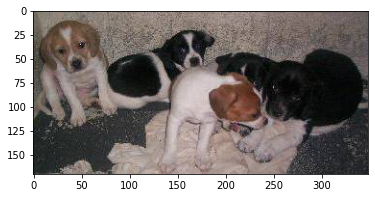

In [ ]:
#displaying the image of dog
img=mpimg.imread('/content/train/dog.11819.jpg')
imgplot=plt.imshow(img)
plt.show()

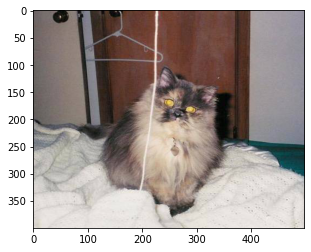

In [ ]:
#displaying the image of cat
img=mpimg.imread('/content/train/cat.8070.jpg')
imgplot=plt.imshow(img)
plt.show()

In [ ]:
img_files=os.listdir('/content/train/')
for img_files in range(10):
  print(file_names[img_files])


dog.1612.jpg
cat.8182.jpg
cat.11860.jpg
cat.264.jpg
cat.1552.jpg
dog.3798.jpg
dog.10052.jpg
dog.2331.jpg
dog.3297.jpg
dog.10857.jpg


In [ ]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


Resizing all the images(keep the original)

In [ ]:
#creating a directory for resized pics
os.mkdir('/content/img_resized')

In [ ]:
original_dir='/content/train/'
resized_dir='/content/img_resized/'
for i in range(4000):
  filename=os.listdir(original_dir)[i]
  img_path=original_dir+filename

  img= Image.open(img_path)
  img=img.resize((224,224))
  img=img.convert('RGB')

  newImagepath=resized_dir+filename
  img.save(newImagepath)

In [ ]:
#displaying the resizedimage of dog
#img=mpimg.imread('/content/img_resized/cat.10034.jpg')
#imgplot=plt.imshow(img)
#plt.show()

In [ ]:
#displaying the resizedimage of cat
#img=mpimg.imread('/content/img_resized/cat.10034.jpg')
#imgplot=plt.imshow(img)
#plt.show()

Creating Labels for resized images for dogs and Cats

Cats->>0
Dogs->>1

In [ ]:
#To assign a label ,use a loop
filenames=os.listdir('/content/img_resized/')
labels=[]
for i in range(4000):
  file_name=filenames[i]
  label=file_name[0:3]
  if label =='dog':
    labels.append(1)
  else:
    labels.append(0)

In [ ]:
print(filenames[0:5])
print(len(filenames))

['dog.1612.jpg', 'cat.8182.jpg', 'cat.11860.jpg', 'cat.264.jpg', 'cat.1552.jpg']
4000


In [ ]:
print(labels[0:20])

[1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1]


In [ ]:
#to count the images of dogs and cats out of 4000 images
values,counts=np.unique(labels,return_counts=True)
print(values)
print(counts)

[0 1]
[1997 2003]


converting the images into array(as models understand only numpy arrays)

In [ ]:
import cv2
import glob

In [ ]:
image_directory='/content/img_resized/'
image_extension=['jpg']
files=[]
[files.extend(glob.glob(image_directory + '*.'+ e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files]) #reading the images and converting them into numpy array


In [ ]:
print(dog_cat_images)

[[[[ 13  27  80]
   [ 13  27  79]
   [ 12  26  78]
   ...
   [ 41  72 127]
   [ 48  79 132]
   [ 51  82 135]]

  [[ 16  30  83]
   [ 16  30  83]
   [ 14  28  80]
   ...
   [ 36  66 121]
   [ 32  59 115]
   [ 28  56 110]]

  [[ 15  30  86]
   [ 16  32  85]
   [ 14  31  82]
   ...
   [ 72  95 151]
   [ 76  96 153]
   [ 77  97 154]]

  ...

  [[159 152 155]
   [160 153 156]
   [163 156 159]
   ...
   [162 155 158]
   [157 150 153]
   [157 150 153]]

  [[152 145 148]
   [150 143 146]
   [159 152 155]
   ...
   [175 168 171]
   [168 161 164]
   [157 150 153]]

  [[182 175 178]
   [161 154 157]
   [157 150 153]
   ...
   [193 186 189]
   [191 184 187]
   [174 167 170]]]


 [[[ 50 103 160]
   [ 61 114 171]
   [ 69 123 178]
   ...
   [ 55 131 190]
   [ 55 132 189]
   [ 55 132 189]]

  [[ 52 105 162]
   [ 62 115 172]
   [ 70 124 179]
   ...
   [ 55 131 190]
   [ 55 132 189]
   [ 55 132 189]]

  [[ 51 106 163]
   [ 60 115 172]
   [ 69 125 180]
   ...
   [ 58 131 191]
   [ 58 132 190]
   [ 59 133

In [ ]:
type(dog_cat_images)

numpy.ndarray

In [ ]:
print(dog_cat_images.shape)

(4000, 224, 224, 3)


In [ ]:
X=dog_cat_images
Y=np.asarray(labels)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(4000, 224, 224, 3) (3200, 224, 224, 3) (800, 224, 224, 3)


 Here we have  3200 training images and 800 test data

In [ ]:
#scaling the data(meaning dividing the colour by 255)
X_train_scaled=X_train/255

X_test_scaled=X_test/255

In [ ]:
print(X_test_scaled)

[[[[0.12941176 0.10196078 0.20784314]
   [0.1372549  0.11372549 0.21176471]
   [0.15294118 0.12156863 0.21176471]
   ...
   [0.51764706 0.47058824 0.55686275]
   [0.4627451  0.41960784 0.49803922]
   [0.36470588 0.32156863 0.4       ]]

  [[0.14117647 0.11372549 0.21960784]
   [0.14509804 0.12156863 0.21960784]
   [0.15294118 0.12156863 0.21176471]
   ...
   [0.49411765 0.45098039 0.52941176]
   [0.43137255 0.38823529 0.46666667]
   [0.36078431 0.31764706 0.39607843]]

  [[0.15294118 0.1254902  0.23137255]
   [0.15294118 0.12941176 0.22745098]
   [0.16078431 0.12941176 0.21960784]
   ...
   [0.44705882 0.40392157 0.48235294]
   [0.39607843 0.35294118 0.43137255]
   [0.36862745 0.32941176 0.39607843]]

  ...

  [[0.23137255 0.19607843 0.30196078]
   [0.23137255 0.19607843 0.30196078]
   [0.26666667 0.23137255 0.3372549 ]
   ...
   [0.3372549  0.30196078 0.47058824]
   [0.34509804 0.30980392 0.47843137]
   [0.32941176 0.29411765 0.4627451 ]]

  [[0.25098039 0.21176471 0.32941176]
   [0.2

[link text](https://)Building the Neural network

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [ ]:
num_class=2
model=tf.keras.Sequential([
    pretrained_model, #first layer
    tf.keras.layers.Dense(num_class)  #output layers
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

In [ ]:
model.fit(X_train_scaled,Y_train,epochs=5)

Epoch 1/5
100/100 [==============================] - 57s 540ms/step - loss: 0.1202 - acc: 0.9563
Epoch 2/5
100/100 [==============================] - 54s 543ms/step - loss: 0.0576 - acc: 0.9797
Epoch 3/5
100/100 [==============================] - 55s 545ms/step - loss: 0.0446 - acc: 0.9844
Epoch 4/5
100/100 [==============================] - 55s 545ms/step - loss: 0.0372 - acc: 0.9884
Epoch 5/5
100/100 [==============================] - 54s 542ms/step - loss: 0.0317 - acc: 0.9897


In [ ]:
score,accuracy=model.evaluate(X_test_scaled,Y_test)
print('Test loss=',score)
print('Test Accuracy=' ,accuracy)

25/25 [==============================] - 14s 543ms/step - loss: 0.0492 - acc: 0.9825
Test loss= 0.049183931201696396
Test Accuracy= 0.9825000166893005


Path of the image to be predicted: /content/sample4.jpeg


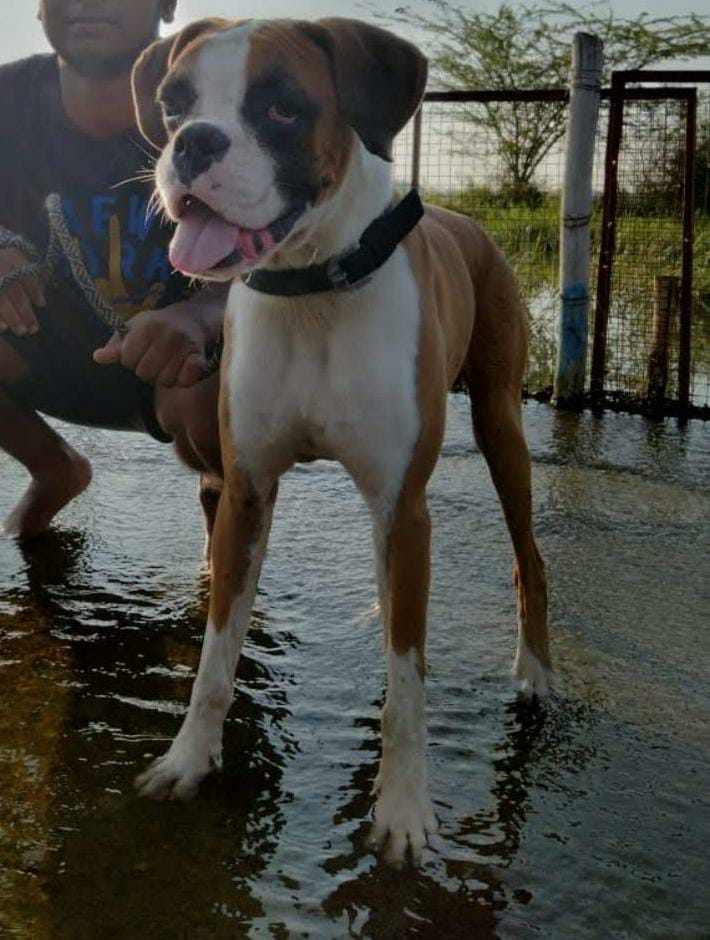

[[-4.1588364  4.61509  ]]
1
The image represents a Dog


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')